In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('E:\Level 4\Research Project\Data sets\Weather_Solar_Energy_Data_New.xlsx')

In [3]:
df.head()

,Date,Time,Generation_solar,Avg_Temp,Average_Pressure,Avg_Humidity,Avg_Wind_Speed,wind_deg,Average_Rainfall,Average_Snow,Average_Cloud_all,Avg_Weather_id
0,2015-01-01,10:00:00+01:00,2019.0,275.229600,1018.8,76.2,1.4,353,0.0,0.0,0.0,800.0
1,2015-01-01,11:00:00+01:00,3197.0,282.245338,1019.2,72.4,1.8,272,0.0,0.0,0.0,800.0
2,2015-01-01,12:00:00+01:00,3885.0,283.001469,1019.2,69.2,1.8,272,0.0,0.0,0.0,800.0
3,2015-01-01,13:00:00+01:00,4007.0,282.702100,1019.2,71.4,1.8,272,0.0,0.0,0.0,800.0
4,2015-01-01,14:00:00+01:00,3973.0,284.351194,1032.2,52.8,2.0,275,0.0,0.0,0.0,800.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               11682 non-null  datetime64[ns]
 1   Time               11682 non-null  object        
 2   Generation_solar   11680 non-null  float64       
 3   Avg_Temp           11682 non-null  float64       
 4   Average_Pressure   11682 non-null  float64       
 5   Avg_Humidity       11682 non-null  float64       
 6   Avg_Wind_Speed     11682 non-null  float64       
 7   wind_deg           11682 non-null  int64         
 8   Average_Rainfall   11682 non-null  float64       
 9   Average_Snow       11682 non-null  float64       
 10  Average_Cloud_all  11682 non-null  float64       
 11  Avg_Weather_id     11682 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['Generation_solar', 'Avg_Temp', 'Average_Pressure', 'Avg_Humidity', 'Avg_Wind_Speed', 'wind_deg', 'Average_Rainfall', 'Average_Snow', 'Average_Cloud_all']

scaler = StandardScaler()

std_df = scaler.fit_transform(df[columns_to_standardize])

In [9]:
std_df = pd.DataFrame(std_df, columns=columns_to_standardize)

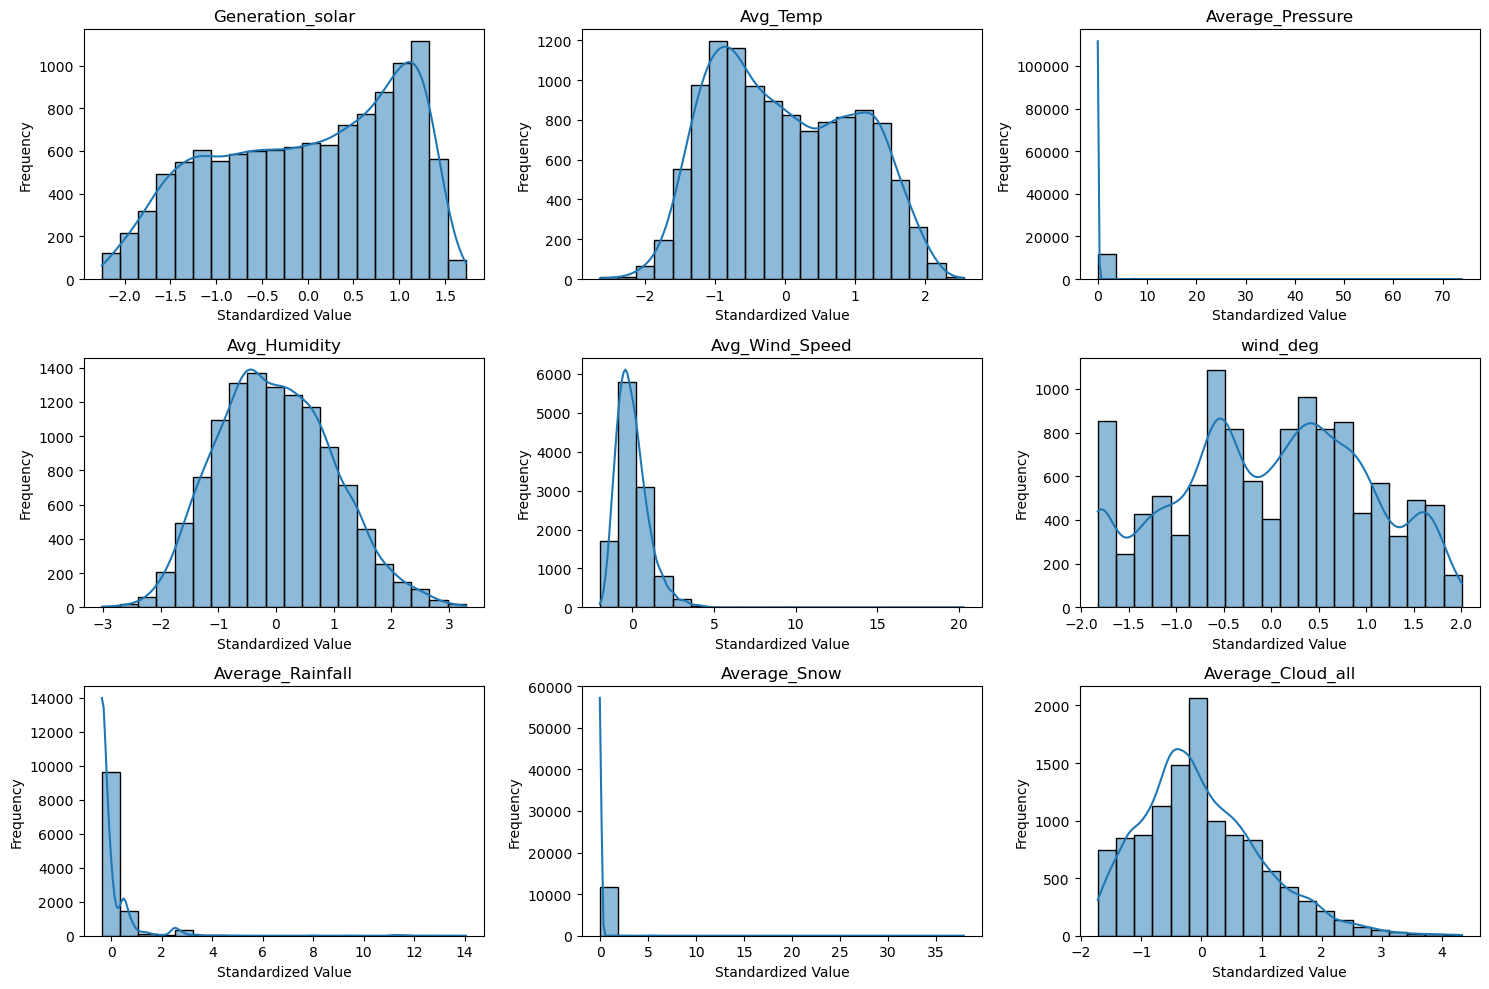

In [18]:
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, column in enumerate(std_df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(std_df[column], bins=20, kde=True)
    plt.title(column)
    plt.xlabel('Standardized Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'Generation_solar' column
imputer.fit(df[['Generation_solar']])

# Transform the 'Generation_solar' column using the imputer
std_df['Generation_solar'] = imputer.transform(df[['Generation_solar']])

In [24]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Generation_solar   11682 non-null  float64
 1   Avg_Temp           11682 non-null  float64
 2   Average_Pressure   11682 non-null  float64
 3   Avg_Humidity       11682 non-null  float64
 4   Avg_Wind_Speed     11682 non-null  float64
 5   wind_deg           11682 non-null  float64
 6   Average_Rainfall   11682 non-null  float64
 7   Average_Snow       11682 non-null  float64
 8   Average_Cloud_all  11682 non-null  float64
dtypes: float64(9)
memory usage: 821.5 KB


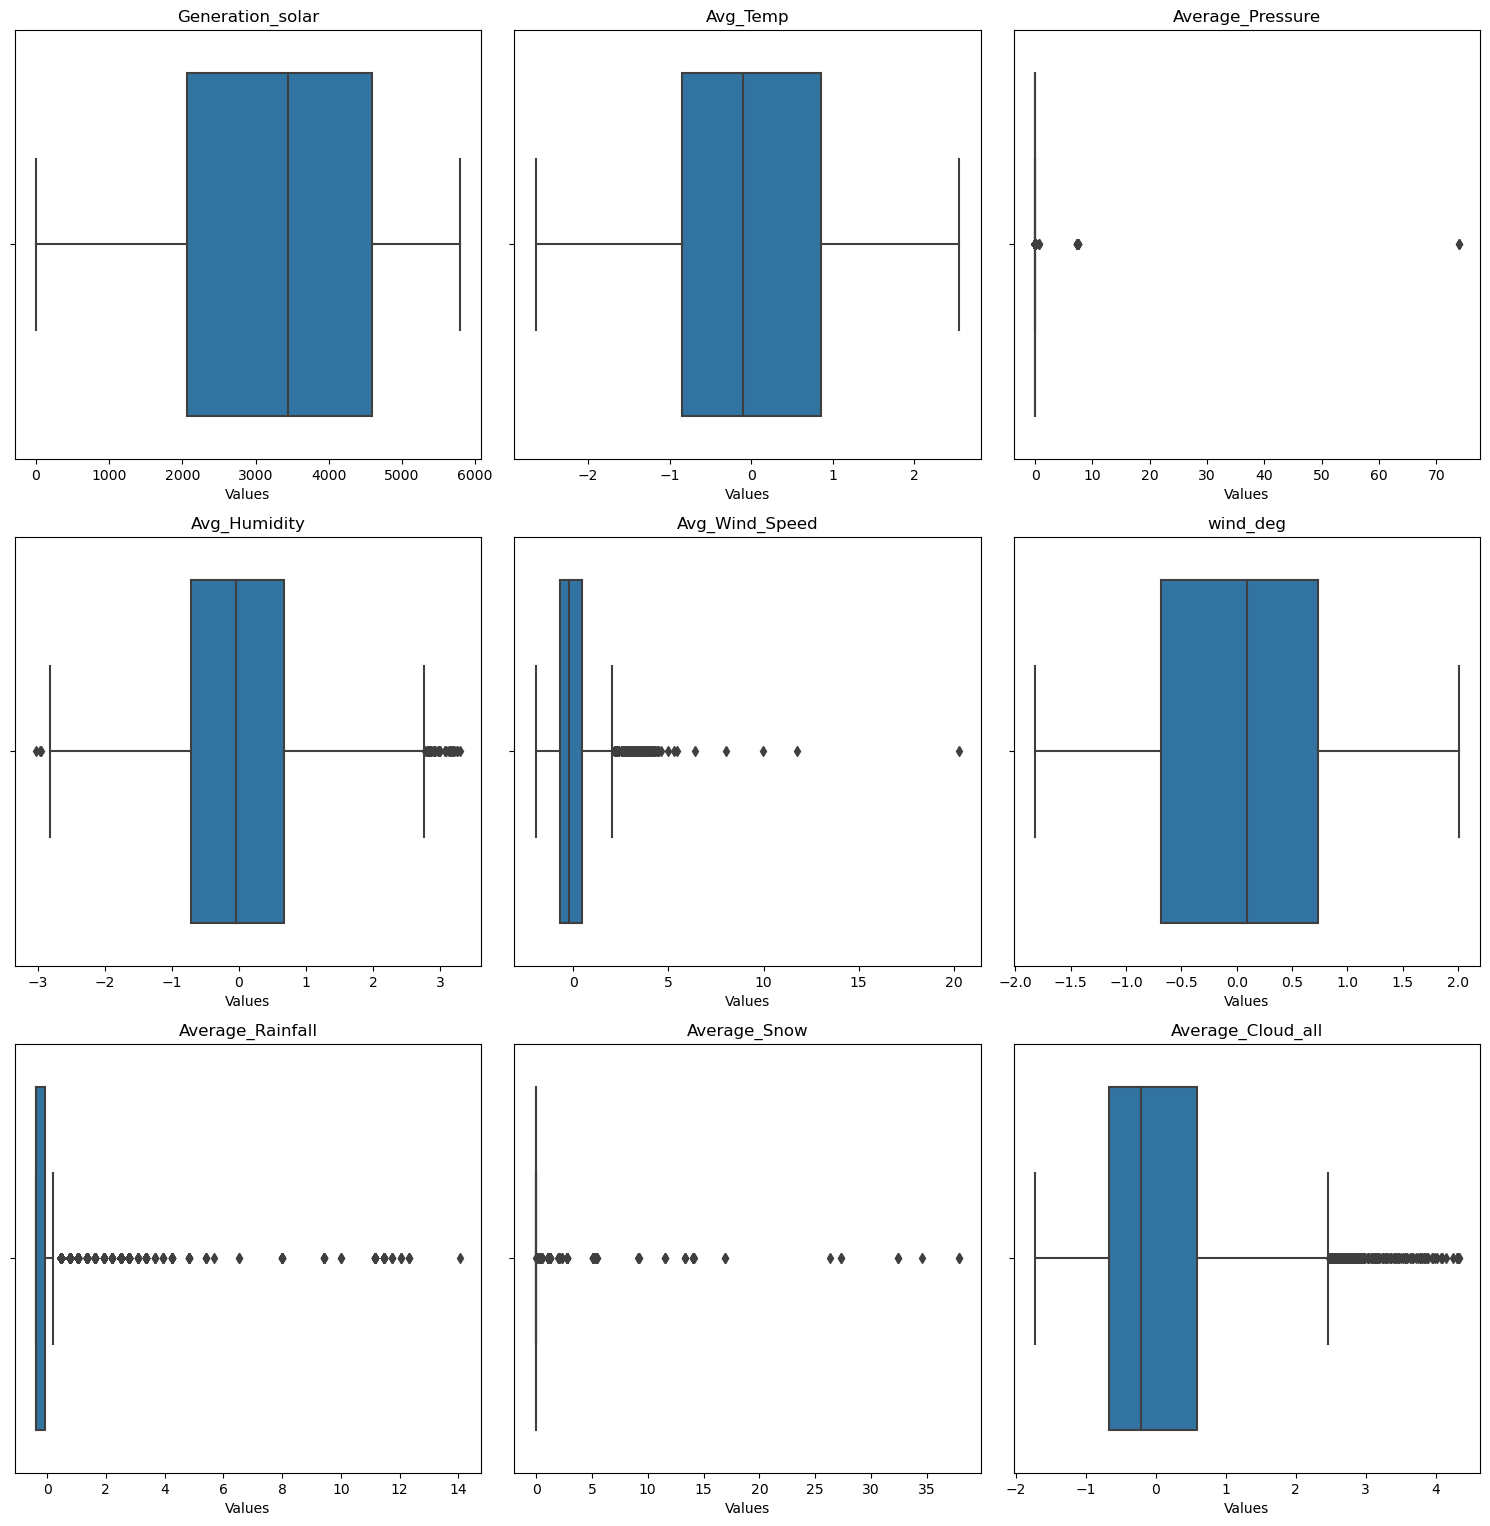

In [25]:
# Plot box plots for each column separately
plt.figure(figsize=(15, 20))
for i, column in enumerate(std_df.columns):
    plt.subplot(len(std_df.columns)//3 + 1, 3, i+1)
    sns.boxplot(x=std_df[column])
    plt.title(column)
    plt.xlabel('Values')
plt.tight_layout()
plt.show()

In [26]:
Q1 = std_df.quantile(0.25)
Q3 = std_df.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_counts = ((std_df < lower_bound) | (std_df > upper_bound)).sum()

print("Number of outliers using IQR method:")
print(outlier_counts)

Number of outliers using IQR method:
Generation_solar        0
Avg_Temp                0
Average_Pressure     1122
Avg_Humidity           43
Avg_Wind_Speed        399
wind_deg                0
Average_Rainfall     2073
Average_Snow           85
Average_Cloud_all     219
dtype: int64


In [27]:
std_df.describe()

,Generation_solar,Avg_Temp,Average_Pressure,Avg_Humidity,Avg_Wind_Speed,wind_deg,Average_Rainfall,Average_Snow,Average_Cloud_all
count,11682.000000,1.168200e+04,1.168200e+04,1.168200e+04,1.168200e+04,1.168200e+04,1.168200e+04,1.168200e+04,1.168200e+04
mean,3275.376134,1.907432e-15,-6.812257e-17,1.946359e-16,2.019348e-16,1.459769e-16,-1.946359e-17,1.459769e-17,8.272026e-17
std,1456.240257,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,0.000000,-2.644103e+00,-3.338291e-02,-3.021746e+00,-1.994623e+00,-1.823611e+00,-3.776259e-01,-5.258082e-02,-1.724893e+00
25%,2060.000000,-8.438464e-01,-2.259319e-02,-7.202328e-01,-7.020786e-01,-6.852042e-01,-3.776259e-01,-5.258082e-02,-6.673165e-01
50%,3449.000000,-9.990457e-02,-2.133685e-02,-3.898505e-02,-2.173742e-01,9.146609e-02,-3.776259e-01,-5.258082e-02,-2.046270e-01
75%,4593.000000,8.544681e-01,-2.022832e-02,6.790869e-01,4.288982e-01,7.298253e-01,-8.908998e-02,-5.258082e-02,5.885551e-01
max,5792.000000,2.551115e+00,7.390918e+01,3.293605e+00,2.030177e+01,2.006544e+00,1.404917e+01,3.790253e+01,4.329730e+00


In [29]:
# Calculate median and mean of each variable
median_values = std_df.median()
mean_values = std_df.mean()

# Display the median and mean of each variable
print("Median values:")
print(median_values)
print("\nMean values:")
print(mean_values)

Median values:
Generation_solar     3449.000000
Avg_Temp               -0.099905
Average_Pressure       -0.021337
Avg_Humidity           -0.038985
Avg_Wind_Speed         -0.217374
wind_deg                0.091466
Average_Rainfall       -0.377626
Average_Snow           -0.052581
Average_Cloud_all      -0.204627
dtype: float64

Mean values:
Generation_solar     3.275376e+03
Avg_Temp             1.907432e-15
Average_Pressure    -6.812257e-17
Avg_Humidity         1.946359e-16
Avg_Wind_Speed       2.019348e-16
wind_deg             1.459769e-16
Average_Rainfall    -1.946359e-17
Average_Snow         1.459769e-17
Average_Cloud_all    8.272026e-17
dtype: float64


In [32]:
from scipy import stats

for variable in std_df.columns:
    stat, p_value = stats.shapiro(std_df[variable])
    alpha = 0.05
    print(f"Shapiro-Wilk test for {variable}:")
    print(f"Test Statistic: {stat}, p-value: {p_value}")
    if p_value < alpha:
        print("The variable does not appear to be normally distributed")
    else:
        print("The variable appears to be normally distributed (fail to reject H0)")
    print("\n")

Shapiro-Wilk test for Generation_solar:
Test Statistic: 0.9490001797676086, p-value: 0.0
The variable does not appear to be normally distributed


Shapiro-Wilk test for Avg_Temp:
Test Statistic: 0.9686733484268188, p-value: 1.961817850054744e-44
The variable does not appear to be normally distributed


Shapiro-Wilk test for Average_Pressure:
Test Statistic: 0.006443917751312256, p-value: 0.0
The variable does not appear to be normally distributed


Shapiro-Wilk test for Avg_Humidity:
Test Statistic: 0.9942739605903625, p-value: 3.806886319567203e-21
The variable does not appear to be normally distributed


Shapiro-Wilk test for Avg_Wind_Speed:
Test Statistic: 0.9102150201797485, p-value: 0.0
The variable does not appear to be normally distributed


Shapiro-Wilk test for wind_deg:
Test Statistic: 0.974844753742218, p-value: 6.475260073798547e-41
The variable does not appear to be normally distributed


Shapiro-Wilk test for Average_Rainfall:
Test Statistic: 0.38299524784088135, p-value:

In [48]:
Q1 = std_df['Avg_Humidity'].quantile(0.25)
Q3 = std_df['Avg_Humidity'].quantile(0.75)
IQR = Q3 - Q1
outrows = ((std_df['Avg_Humidity'] < Q1 - 1.5*IQR)|(std_df['Avg_Humidity']>Q3+1.5*IQR))
std_new = std_df.copy()
std_new = std_new[~outrows]
print('Shape before removing the outlier {}'.format(std_df.shape))
print('shape after removing the outliers {}'.format(std_new.shape))
std_df = std_new.copy()

Shape before removing the outlier (11442, 9)
shape after removing the outliers (11442, 9)


In [49]:
Q1 = std_df['Avg_Wind_Speed'].quantile(0.25)
Q3 = std_df['Avg_Wind_Speed'].quantile(0.75)
IQR = Q3 - Q1
outrows1 = ((std_df['Avg_Wind_Speed'] < Q1 - 1.5*IQR)|(std_df['Avg_Wind_Speed']>Q3+1.5*IQR))
std_new1 = std_df.copy()
std_new1 = std_new1[~outrows1]
print('Shape before removing the outlier {}'.format(std_df.shape))
print('shape after removing the outliers {}'.format(std_new1.shape))
std_df = std_new1.copy()

Shape before removing the outlier (11442, 9)
shape after removing the outliers (11063, 9)


In [50]:
Q1 = std_df['Average_Rainfall'].quantile(0.25)
Q3 = std_df['Average_Rainfall'].quantile(0.75)
IQR = Q3 - Q1
outrows2 = ((std_df['Average_Rainfall'] < Q1 - 1.5*IQR)|(std_df['Average_Rainfall']>Q3+1.5*IQR))
std_new2 = std_df.copy()
std_new2 = std_new2[~outrows2]
print('Shape before removing the outlier {}'.format(std_df.shape))
print('shape after removing the outliers {}'.format(std_new2.shape))
std_df = std_new2.copy()

Shape before removing the outlier (11063, 9)
shape after removing the outliers (9306, 9)


In [51]:
Q1 = std_df['Average_Snow'].quantile(0.25)
Q3 = std_df['Average_Snow'].quantile(0.75)
IQR = Q3 - Q1
outrows3 = ((std_df['Average_Snow'] < Q1 - 1.5*IQR)|(std_df['Average_Snow']>Q3+1.5*IQR))
std_new3 = std_df.copy()
std_new3 = std_new3[~outrows3]
print('Shape before removing the outlier {}'.format(std_df.shape))
print('shape after removing the outliers {}'.format(std_new3.shape))
std_df = std_new3.copy()

Shape before removing the outlier (9306, 9)
shape after removing the outliers (9278, 9)


In [52]:
Q1 = std_df['Average_Cloud_all'].quantile(0.25)
Q3 = std_df['Average_Cloud_all'].quantile(0.75)
IQR = Q3 - Q1
outrows4 = ((std_df['Average_Cloud_all'] < Q1 - 1.5*IQR)|(std_df['Average_Cloud_all']>Q3+1.5*IQR))
std_new4 = std_df.copy()
std_new4 = std_new4[~outrows4]
print('Shape before removing the outlier {}'.format(std_df.shape))
print('shape after removing the outliers {}'.format(std_new4.shape))
std_df = std_new4.copy()

Shape before removing the outlier (9278, 9)
shape after removing the outliers (9212, 9)


In [53]:
std_df.shape

(9212, 9)

In [55]:
std_df.head()

,Generation_solar,Avg_Temp,Average_Pressure,Avg_Humidity,Avg_Wind_Speed,wind_deg,Average_Rainfall,Average_Snow,Average_Cloud_all
0,2019.0,-2.644103,-0.020672,1.562868,-1.186783,1.932068,-0.377626,-0.052581,-1.724893
1,3197.0,-1.560957,-0.020524,1.213038,-0.863647,1.070283,-0.377626,-0.052581,-1.724893
2,3885.0,-1.444220,-0.020524,0.918444,-0.863647,1.070283,-0.377626,-0.052581,-1.724893
3,4007.0,-1.490439,-0.020524,1.120977,-0.863647,1.070283,-0.377626,-0.052581,-1.724893
4,3973.0,-1.235839,-0.015720,-0.591348,-0.702079,1.102201,-0.377626,-0.052581,-1.724893


Correlation Matrix:
                   Generation_solar  Avg_Temp  Average_Pressure  Avg_Humidity  \
Generation_solar           1.000000  0.351910         -0.012125     -0.315065   
Avg_Temp                   0.351910  1.000000         -0.034561     -0.633949   
Average_Pressure          -0.012125 -0.034561          1.000000      0.002866   
Avg_Humidity              -0.315065 -0.633949          0.002866      1.000000   
Avg_Wind_Speed             0.012015 -0.036711         -0.010165     -0.151884   
wind_deg                  -0.097360 -0.154281          0.004901      0.017148   
Average_Rainfall          -0.065324 -0.217641          0.030345      0.279481   
Average_Snow                    NaN       NaN               NaN           NaN   
Average_Cloud_all         -0.130307 -0.270950          0.021377      0.450288   

                   Avg_Wind_Speed  wind_deg  Average_Rainfall  Average_Snow  \
Generation_solar         0.012015 -0.097360         -0.065324           NaN   
Avg_Temp   

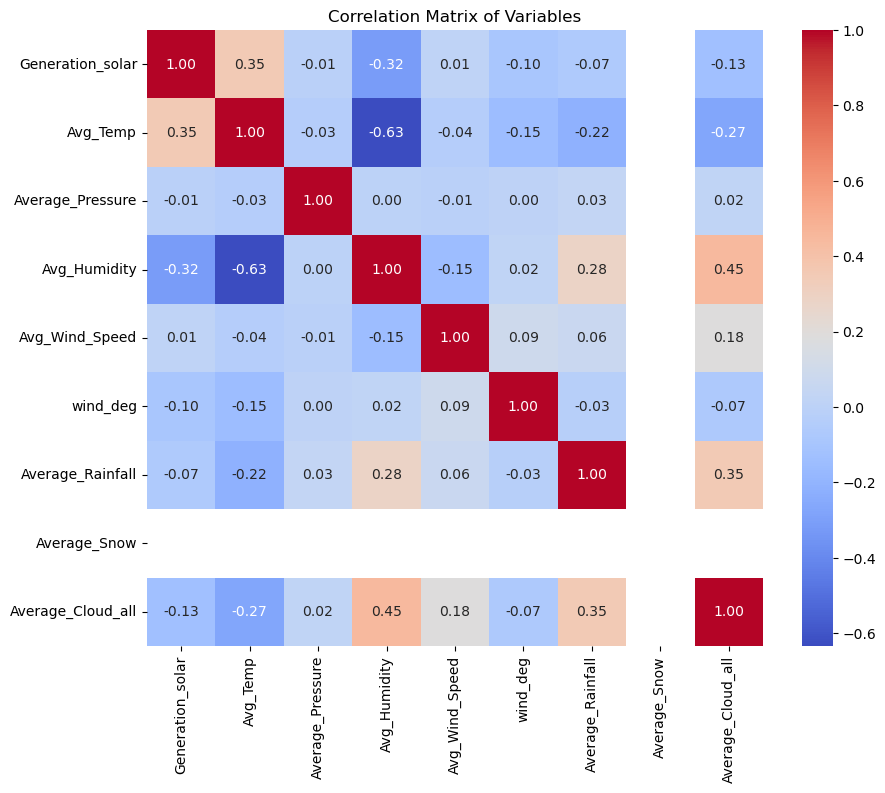

In [57]:
# Calculate the correlation matrix
correlation_matrix = std_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Variables')
plt.show()

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to hold the VIF results
vif_data = pd.DataFrame()
vif_data["Variable"] = std_df.columns
vif_data["VIF"] = [variance_inflation_factor(std_df.values, i) for i in range(len(std_df.columns))]

# Print the VIF results
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
            Variable        VIF
0   Generation_solar   1.165823
1           Avg_Temp   1.860796
2   Average_Pressure   1.003600
3       Avg_Humidity   2.223689
4     Avg_Wind_Speed   1.168134
5           wind_deg   1.057904
6   Average_Rainfall   1.175223
7       Average_Snow  11.598769
8  Average_Cloud_all   1.480316


In [60]:
from sklearn.model_selection import train_test_split

X = std_df.drop(columns=['Generation_solar'])
y = std_df['Generation_solar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)

Training set - X: (7369, 8) y: (7369,)
Testing set - X: (1843, 8) y: (1843,)


In [61]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Training RMSE:", train_rmse)

Training RMSE: 1338.0500204037025


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

ridge_model = Ridge()

alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

param_grid = {'alpha': alphas}

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring=make_scorer(rmse), verbose=1)

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha value:", best_alpha)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best alpha value: 0.001


In [66]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = elastic_net_model.predict(X_train)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Training RMSE:", train_rmse)

Training RMSE: 1338.0506640857348


In [64]:
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Training RMSE:", train_rmse)

Training RMSE: 1338.0499674499686
